In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
#set workingdirectory
os.chdir("G:\edwisor")

In [3]:
#get workingdirectory
os.getcwd()

'G:\\edwisor'

In [4]:
#load data
data = pd.read_csv("day.csv", sep = ',')

In [5]:
#see first 5 observations
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
#see no of rows and columns
data.shape

(731, 16)

In [7]:
#see data type and count
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
#number of unique values in all variables
data.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [9]:
#convert numeric to object
data['season'] = data['season'].astype(object)
data['yr'] = data['yr'].astype(object)
data['mnth'] = data['mnth'].astype(object)
data['holiday'] = data['holiday'].astype(object)
data['weekday'] = data['weekday'].astype(object)
data['workingday'] = data['workingday'].astype(object)
data['weathersit'] = data['weathersit'].astype(object)

In [10]:
#summary of the numeric variables
data.describe()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


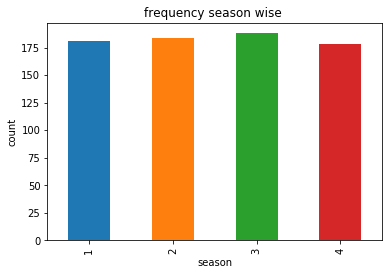

In [11]:
#bargraph
var = data.groupby('season').season.count() 
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('season')
ax1.set_ylabel('count')
ax1.set_title("frequency season wise ")
var.plot(kind='bar')

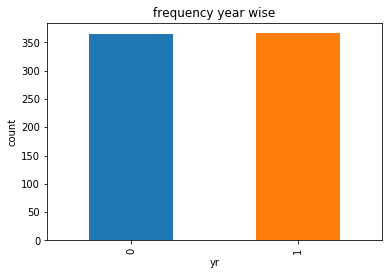

In [12]:
var = data.groupby('yr').yr.count() 
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('year')
ax1.set_ylabel('count')
ax1.set_title("frequency year wise")
var.plot(kind='bar')

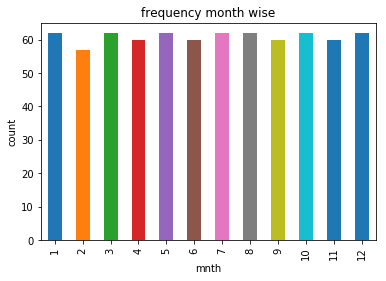

In [13]:
var = data.groupby('mnth').mnth.count() 
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('month')
ax1.set_ylabel('count')
ax1.set_title("frequency month wise")
var.plot(kind='bar')

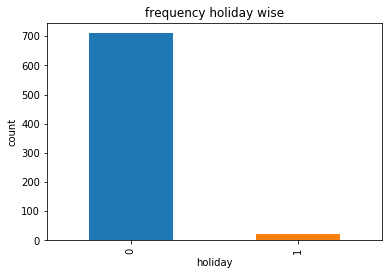

In [14]:
var = data.groupby('holiday').holiday.count() 
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('holiday')
ax1.set_ylabel('count')
ax1.set_title("frequency holiday wise")
var.plot(kind='bar')

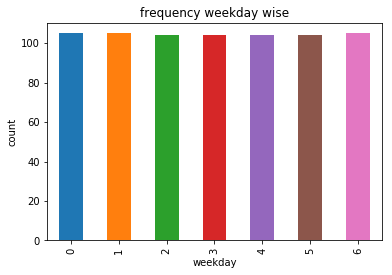

In [15]:
var = data.groupby('weekday').weekday.count() 
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('weekday')
ax1.set_ylabel('count')
ax1.set_title("frequency weekday wise")
var.plot(kind='bar')

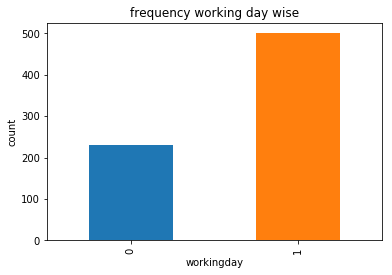

In [16]:
var = data.groupby('workingday').workingday.count() 
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('workingday')
ax1.set_ylabel('count')
ax1.set_title("frequency working day wise")
var.plot(kind='bar')

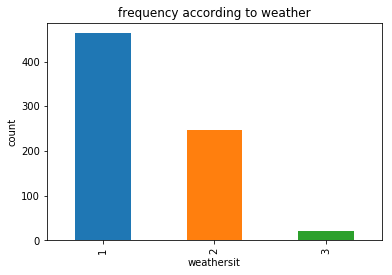

In [17]:
var = data.groupby('weathersit').weathersit.count() 
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('workingday')
ax1.set_ylabel('count')
ax1.set_title("frequency according to weather")
var.plot(kind='bar')

Text(0,0.5,'Frequency')

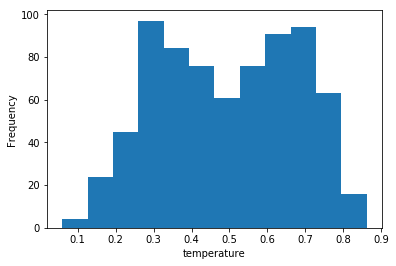

In [18]:
#histogram
plt.hist(data['temp'], bins='auto')
plt.xlabel('temperature')
plt.ylabel("Frequency")

Text(0,0.5,'Frequency')

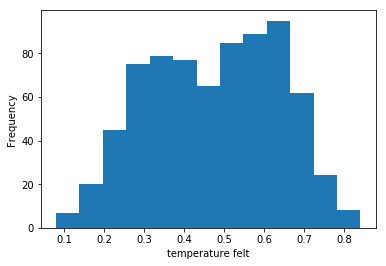

In [19]:
plt.hist(data['atemp'], bins='auto')
plt.xlabel('temperature felt')
plt.ylabel("Frequency")

Text(0,0.5,'Frequency')

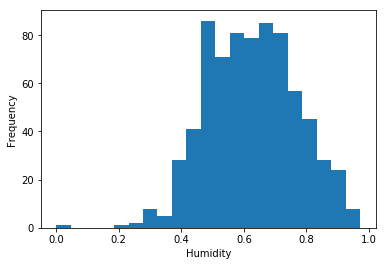

In [20]:
plt.hist(data['hum'], bins='auto')
plt.xlabel('Humidity')
plt.ylabel("Frequency")

Text(0,0.5,'Frequency')

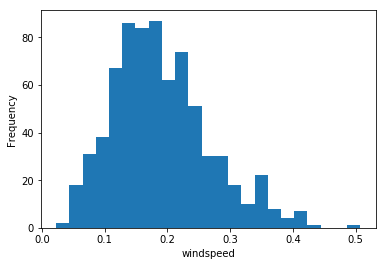

In [21]:
plt.hist(data['windspeed'], bins='auto')
plt.xlabel('windspeed')
plt.ylabel("Frequency")

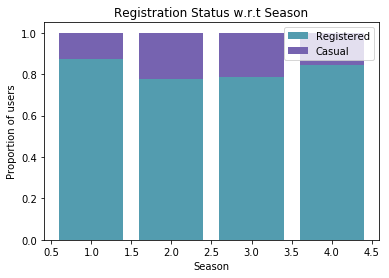

In [22]:
# Calculate the mean number of check outs for each day by
# registration status
mean_by_reg_co_day = data[['season', 'registered', 'casual']].groupby('season').mean()
# Calculate proportion of each category of user for each day
mean_by_reg_co_day['total'] = mean_by_reg_co_day['registered'] + mean_by_reg_co_day['casual']
mean_by_reg_co_day['reg_prop'] = mean_by_reg_co_day['registered'] / mean_by_reg_co_day['total']
mean_by_reg_co_day['casual_prop'] = mean_by_reg_co_day['casual'] / mean_by_reg_co_day['total']


# Define a function for a stacked bar plot
def stackedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # Draw bars, one category at a time
    for i in range(0, len(y_data_list)):
        if i == 0:
            ax.bar(x_data, y_data_list[i], color = colors[i], align = 'center', label = y_data_names[i])
        else:
            # For each category after the first, the bottom of the
            # bar will be the top of the last category
            ax.bar(x_data, y_data_list[i], color = colors[i], bottom = y_data_list[i - 1], align = 'center', label = y_data_names[i])
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right')

# Call the function to create plot
stackedbarplot(x_data = mean_by_reg_co_day.index.values
               , y_data_list = [mean_by_reg_co_day['reg_prop'], mean_by_reg_co_day['casual_prop']]
               , y_data_names = ['Registered', 'Casual']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'Season'
               , y_label = 'Proportion of users'
               , title = 'Registration Status w.r.t Season')

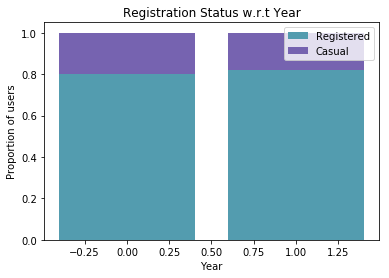

In [23]:
# Calculate the mean number of check outs for each day by
# registration status
mean_by_reg_co_day = data[['yr', 'registered', 'casual']].groupby('yr').mean()
# Calculate proportion of each category of user for each day
mean_by_reg_co_day['total'] = mean_by_reg_co_day['registered'] + mean_by_reg_co_day['casual']
mean_by_reg_co_day['reg_prop'] = mean_by_reg_co_day['registered'] / mean_by_reg_co_day['total']
mean_by_reg_co_day['casual_prop'] = mean_by_reg_co_day['casual'] / mean_by_reg_co_day['total']


# Define a function for a stacked bar plot
def stackedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # Draw bars, one category at a time
    for i in range(0, len(y_data_list)):
        if i == 0:
            ax.bar(x_data, y_data_list[i], color = colors[i], align = 'center', label = y_data_names[i])
        else:
            # For each category after the first, the bottom of the
            # bar will be the top of the last category
            ax.bar(x_data, y_data_list[i], color = colors[i], bottom = y_data_list[i - 1], align = 'center', label = y_data_names[i])
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right')

# Call the function to create plot
stackedbarplot(x_data = mean_by_reg_co_day.index.values
               , y_data_list = [mean_by_reg_co_day['reg_prop'], mean_by_reg_co_day['casual_prop']]
               , y_data_names = ['Registered', 'Casual']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'Year'
               , y_label = 'Proportion of users'
               , title = 'Registration Status w.r.t Year')

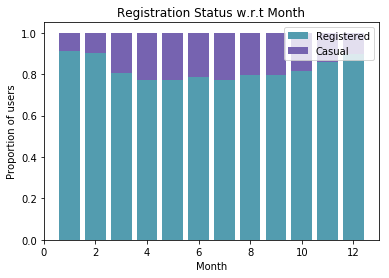

In [24]:
# Calculate the mean number of check outs for each day by
# registration status
mean_by_reg_co_day = data[['mnth', 'registered', 'casual']].groupby('mnth').mean()
# Calculate proportion of each category of user for each day
mean_by_reg_co_day['total'] = mean_by_reg_co_day['registered'] + mean_by_reg_co_day['casual']
mean_by_reg_co_day['reg_prop'] = mean_by_reg_co_day['registered'] / mean_by_reg_co_day['total']
mean_by_reg_co_day['casual_prop'] = mean_by_reg_co_day['casual'] / mean_by_reg_co_day['total']


# Define a function for a stacked bar plot
def stackedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # Draw bars, one category at a time
    for i in range(0, len(y_data_list)):
        if i == 0:
            ax.bar(x_data, y_data_list[i], color = colors[i], align = 'center', label = y_data_names[i])
        else:
            # For each category after the first, the bottom of the
            # bar will be the top of the last category
            ax.bar(x_data, y_data_list[i], color = colors[i], bottom = y_data_list[i - 1], align = 'center', label = y_data_names[i])
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right')

# Call the function to create plot
stackedbarplot(x_data = mean_by_reg_co_day.index.values
               , y_data_list = [mean_by_reg_co_day['reg_prop'], mean_by_reg_co_day['casual_prop']]
               , y_data_names = ['Registered', 'Casual']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'Month'
               , y_label = 'Proportion of users'
               , title = 'Registration Status w.r.t Month')

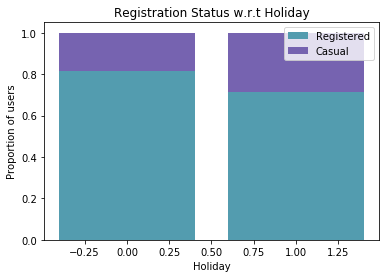

In [25]:
# Calculate the mean number of check outs for each day by
# registration status
mean_by_reg_co_day = data[['holiday', 'registered', 'casual']].groupby('holiday').mean()
# Calculate proportion of each category of user for each day
mean_by_reg_co_day['total'] = mean_by_reg_co_day['registered'] + mean_by_reg_co_day['casual']
mean_by_reg_co_day['reg_prop'] = mean_by_reg_co_day['registered'] / mean_by_reg_co_day['total']
mean_by_reg_co_day['casual_prop'] = mean_by_reg_co_day['casual'] / mean_by_reg_co_day['total']


# Define a function for a stacked bar plot
def stackedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # Draw bars, one category at a time
    for i in range(0, len(y_data_list)):
        if i == 0:
            ax.bar(x_data, y_data_list[i], color = colors[i], align = 'center', label = y_data_names[i])
        else:
            # For each category after the first, the bottom of the
            # bar will be the top of the last category
            ax.bar(x_data, y_data_list[i], color = colors[i], bottom = y_data_list[i - 1], align = 'center', label = y_data_names[i])
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right')

# Call the function to create plot
stackedbarplot(x_data = mean_by_reg_co_day.index.values
               , y_data_list = [mean_by_reg_co_day['reg_prop'], mean_by_reg_co_day['casual_prop']]
               , y_data_names = ['Registered', 'Casual']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'Holiday'
               , y_label = 'Proportion of users'
               , title = 'Registration Status w.r.t Holiday')

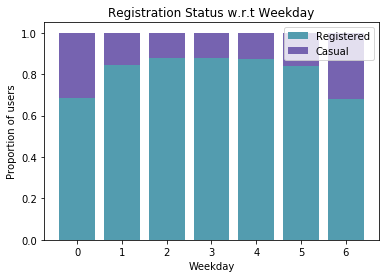

In [26]:
# Calculate the mean number of check outs for each day by
# registration status
mean_by_reg_co_day = data[['weekday', 'registered', 'casual']].groupby('weekday').mean()
# Calculate proportion of each category of user for each day
mean_by_reg_co_day['total'] = mean_by_reg_co_day['registered'] + mean_by_reg_co_day['casual']
mean_by_reg_co_day['reg_prop'] = mean_by_reg_co_day['registered'] / mean_by_reg_co_day['total']
mean_by_reg_co_day['casual_prop'] = mean_by_reg_co_day['casual'] / mean_by_reg_co_day['total']


# Define a function for a stacked bar plot
def stackedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # Draw bars, one category at a time
    for i in range(0, len(y_data_list)):
        if i == 0:
            ax.bar(x_data, y_data_list[i], color = colors[i], align = 'center', label = y_data_names[i])
        else:
            # For each category after the first, the bottom of the
            # bar will be the top of the last category
            ax.bar(x_data, y_data_list[i], color = colors[i], bottom = y_data_list[i - 1], align = 'center', label = y_data_names[i])
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right')

# Call the function to create plot
stackedbarplot(x_data = mean_by_reg_co_day.index.values
               , y_data_list = [mean_by_reg_co_day['reg_prop'], mean_by_reg_co_day['casual_prop']]
               , y_data_names = ['Registered', 'Casual']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'Weekday'
               , y_label = 'Proportion of users'
               , title = 'Registration Status w.r.t Weekday')

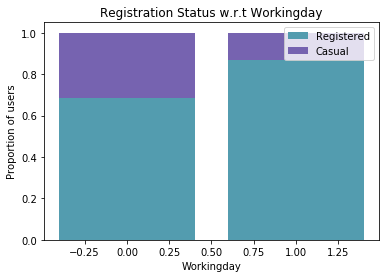

In [27]:
# Calculate the mean number of check outs for each day by
# registration status
mean_by_reg_co_day = data[['workingday', 'registered', 'casual']].groupby('workingday').mean()
# Calculate proportion of each category of user for each day
mean_by_reg_co_day['total'] = mean_by_reg_co_day['registered'] + mean_by_reg_co_day['casual']
mean_by_reg_co_day['reg_prop'] = mean_by_reg_co_day['registered'] / mean_by_reg_co_day['total']
mean_by_reg_co_day['casual_prop'] = mean_by_reg_co_day['casual'] / mean_by_reg_co_day['total']


# Define a function for a stacked bar plot
def stackedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # Draw bars, one category at a time
    for i in range(0, len(y_data_list)):
        if i == 0:
            ax.bar(x_data, y_data_list[i], color = colors[i], align = 'center', label = y_data_names[i])
        else:
            # For each category after the first, the bottom of the
            # bar will be the top of the last category
            ax.bar(x_data, y_data_list[i], color = colors[i], bottom = y_data_list[i - 1], align = 'center', label = y_data_names[i])
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right')

# Call the function to create plot
stackedbarplot(x_data = mean_by_reg_co_day.index.values
               , y_data_list = [mean_by_reg_co_day['reg_prop'], mean_by_reg_co_day['casual_prop']]
               , y_data_names = ['Registered', 'Casual']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'Workingday'
               , y_label = 'Proportion of users'
               , title = 'Registration Status w.r.t Workingday')

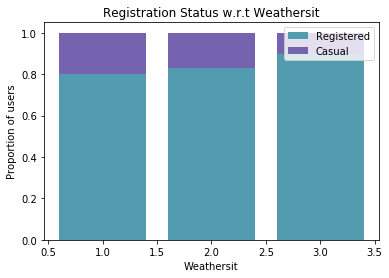

In [28]:
# Calculate the mean number of check outs for each day by
# registration status
mean_by_reg_co_day = data[['weathersit', 'registered', 'casual']].groupby('weathersit').mean()
# Calculate proportion of each category of user for each day
mean_by_reg_co_day['total'] = mean_by_reg_co_day['registered'] + mean_by_reg_co_day['casual']
mean_by_reg_co_day['reg_prop'] = mean_by_reg_co_day['registered'] / mean_by_reg_co_day['total']
mean_by_reg_co_day['casual_prop'] = mean_by_reg_co_day['casual'] / mean_by_reg_co_day['total']


# Define a function for a stacked bar plot
def stackedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # Draw bars, one category at a time
    for i in range(0, len(y_data_list)):
        if i == 0:
            ax.bar(x_data, y_data_list[i], color = colors[i], align = 'center', label = y_data_names[i])
        else:
            # For each category after the first, the bottom of the
            # bar will be the top of the last category
            ax.bar(x_data, y_data_list[i], color = colors[i], bottom = y_data_list[i - 1], align = 'center', label = y_data_names[i])
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right')

# Call the function to create plot
stackedbarplot(x_data = mean_by_reg_co_day.index.values
               , y_data_list = [mean_by_reg_co_day['reg_prop'], mean_by_reg_co_day['casual_prop']]
               , y_data_names = ['Registered', 'Casual']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'Weathersit'
               , y_label = 'Proportion of users'
               , title = 'Registration Status w.r.t Weathersit')

Text(0.5,0,'temperature')

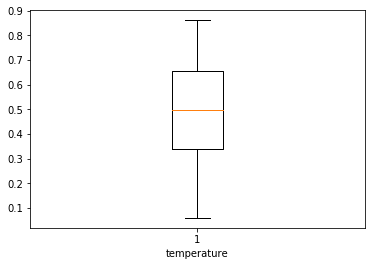

In [29]:
#boxplot for outliers
%matplotlib inline  
plt.boxplot(data['temp'])
plt.xlabel('temperature')

Text(0.5,0,'temperature felt')

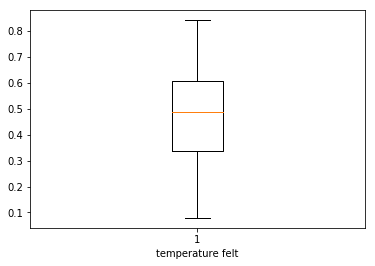

In [30]:
%matplotlib inline  
plt.boxplot(data['atemp'])
plt.xlabel('temperature felt')

Text(0.5,0,'humidity')

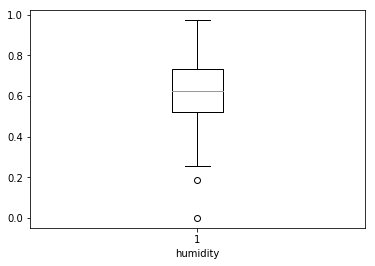

In [31]:
%matplotlib inline  
plt.boxplot(data['hum'])
plt.xlabel('humidity')

In [32]:
#calculate 1th %ile
a = np.array(data['hum'])
p = np.percentile(a, 1) # return 1th percentile, 
print(p)

0.31212510000000004


In [33]:
#replace values in the variable
for i in range(len(data)):
      if  data["hum"].loc[i]<0.31212510000000004:
          data["hum"].loc[i]=0.31212510000000004

G:\Anaconda\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Text(0.5,0,'humidity')

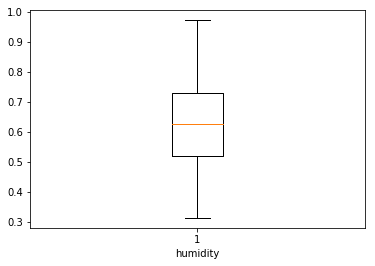

In [34]:
%matplotlib inline  
plt.boxplot(data['hum'])
plt.xlabel('humidity')

Text(0.5,0,'windspeed')

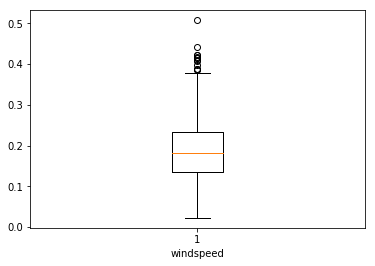

In [35]:
%matplotlib inline  
plt.boxplot(data['windspeed'])
plt.xlabel('windspeed')

In [36]:
#calculate 99th %ile
a = np.array(data['windspeed'])
p = np.percentile(a, 99) # return 99th percentile,
print(p)

0.4086522000000001


In [37]:
#replace values in the variable
for i in range(len(data)):
      if  data["windspeed"].loc[i]>0.4086522000000001:
          data["windspeed"].loc[i]=0.4086522000000001

G:\Anaconda\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Text(0.5,0,'windspeed')

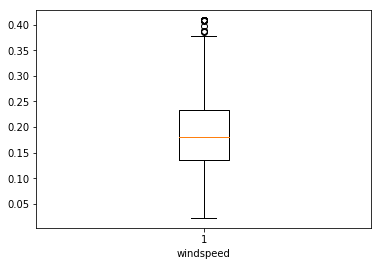

In [38]:
%matplotlib inline  
plt.boxplot(data['windspeed'])
plt.xlabel('windspeed')

In [39]:
#calculate 98th %ile
a = np.array(data['windspeed'])
p = np.percentile(a, 98) # return 98th percentile, 
print(p)

0.37611859999999997


In [40]:
#replace values in the variable
for i in range(len(data)):
      if  data["windspeed"].loc[i]>0.37611859999999997:
          data["windspeed"].loc[i]=0.37611859999999997

G:\Anaconda\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Text(0.5,0,'windspeed')

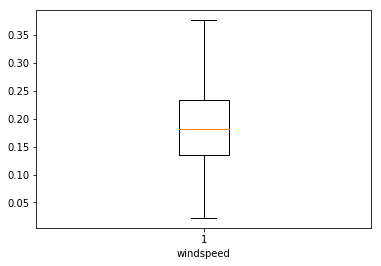

In [41]:
%matplotlib inline  
plt.boxplot(data['windspeed'])
plt.xlabel('windspeed')

In [42]:
##Create dummies for categorical variables
cat_names = ["season",'mnth','yr', "weekday",'weathersit']

for i in cat_names:
    temp = pd.get_dummies(data[i], prefix = i)
    data = data.join(temp)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 44 columns):
instant         731 non-null int64
dteday          731 non-null object
season          731 non-null object
yr              731 non-null object
mnth            731 non-null object
holiday         731 non-null object
weekday         731 non-null object
workingday      731 non-null object
weathersit      731 non-null object
temp            731 non-null float64
atemp           731 non-null float64
hum             731 non-null float64
windspeed       731 non-null float64
casual          731 non-null int64
registered      731 non-null int64
cnt             731 non-null int64
season_1        731 non-null uint8
season_2        731 non-null uint8
season_3        731 non-null uint8
season_4        731 non-null uint8
mnth_1          731 non-null uint8
mnth_2          731 non-null uint8
mnth_3          731 non-null uint8
mnth_4          731 non-null uint8
mnth_5          731 non-null uint8
mnth

In [44]:
#delete variable
del data['season']
del data['yr']
del data['mnth']
del data['weekday']
del data['weathersit']
del data['instant']
del data['dteday']

In [45]:
data.head()

,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_1,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,0,0,0.344167,0.363625,0.805833,0.160446,331,654,985,1,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0.363478,0.353739,0.696087,0.248539,131,670,801,1,...,1,0,0,0,0,0,0,0,1,0
2,0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1,...,0,1,0,0,0,0,0,1,0,0
3,0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1,...,0,0,1,0,0,0,0,1,0,0
4,0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1,...,0,0,0,1,0,0,0,1,0,0


In [46]:
cnames = ['holiday','workingday','temp','atemp','hum','windspeed','casual','registered','cnt','season_1','season_2',
          'season_3','season_4','mnth_1','mnth_2','mnth_3','mnth_4','mnth_5','mnth_6','mnth_7','mnth_8','mnth_9','mnth_10',
          'mnth_11','mnth_12','yr_0','yr_1','weekday_0','weekday_1','weekday_2','weekday_3','weekday_4','weekday_5','weekday_6',
          'weathersit_1','weathersit_2','weathersit_3']

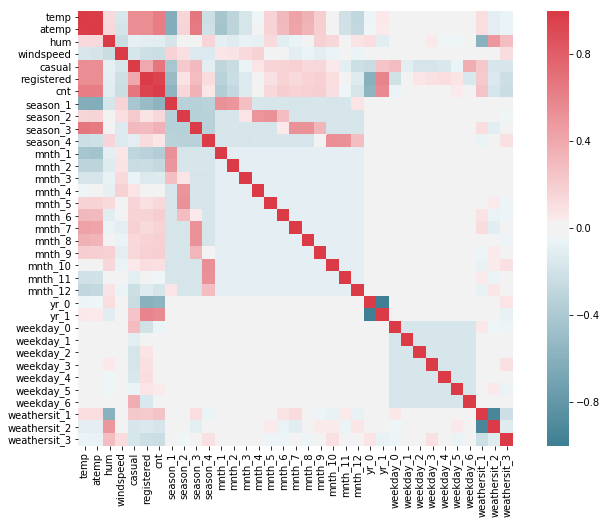

In [47]:
#correlation
df_corr = data.loc[:,cnames]
#correlation plot
f, ax = plt.subplots(figsize=(12,8))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [48]:
#delete variable
del data['atemp']
del data['casual']
del data['registered']
del data['yr_1']
del data['weathersit_2']

In [49]:
data.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,...,yr_0,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_3
0,0,0,0.344167,0.805833,0.160446,985,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,0.363478,0.696087,0.248539,801,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,0,1,0.196364,0.437273,0.248309,1349,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
3,0,1,0.200000,0.590435,0.160296,1562,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4,0,1,0.226957,0.436957,0.186900,1600,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [51]:
columnsTitles = ['holiday','workingday','temp','hum','windspeed','season_1','season_2','season_3','season_4',
                 'mnth_1','mnth_2','mnth_3','mnth_4','mnth_5','mnth_6','mnth_7','mnth_8','mnth_9','mnth_10','mnth_11','mnth_12',
                 'yr_0','weekday_0','weekday_1','weekday_2','weekday_3','weekday_4','weekday_5','weekday_6','weathersit_1',
                 'weathersit_3','cnt']

In [52]:
#rearranging columns
data=data.reindex(columns=columnsTitles)

In [53]:
data.head()

,holiday,workingday,temp,hum,windspeed,season_1,season_2,season_3,season_4,mnth_1,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_3,cnt
0,0,0,0.344167,0.805833,0.160446,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,985
1,0,0,0.363478,0.696087,0.248539,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,801
2,0,1,0.196364,0.437273,0.248309,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1349
3,0,1,0.200000,0.590435,0.160296,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1562
4,0,1,0.226957,0.436957,0.186900,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1600


In [54]:
copy = data.copy()

In [55]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 32 columns):
holiday         731 non-null object
workingday      731 non-null object
temp            731 non-null float64
hum             731 non-null float64
windspeed       731 non-null float64
season_1        731 non-null uint8
season_2        731 non-null uint8
season_3        731 non-null uint8
season_4        731 non-null uint8
mnth_1          731 non-null uint8
mnth_2          731 non-null uint8
mnth_3          731 non-null uint8
mnth_4          731 non-null uint8
mnth_5          731 non-null uint8
mnth_6          731 non-null uint8
mnth_7          731 non-null uint8
mnth_8          731 non-null uint8
mnth_9          731 non-null uint8
mnth_10         731 non-null uint8
mnth_11         731 non-null uint8
mnth_12         731 non-null uint8
yr_0            731 non-null uint8
weekday_0       731 non-null uint8
weekday_1       731 non-null uint8
weekday_2       731 non-null uint8
weekday_3   

In [56]:
#Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

G:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [57]:
#divide train and test data
train, test = train_test_split(data, test_size=0.2)

In [58]:
#desicion tree regression
fit_DT = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,0:31], train.iloc[:,31])

In [59]:
#apply on test data
predictions_DT = fit_DT.predict(test.iloc[:,0:31])

In [60]:
predictions_DT

array([3638.24698795, 1853.48611111, 3638.24698795, 6616.73076923,
       6616.73076923, 1853.48611111, 3638.24698795, 4358.63414634,
       3638.24698795, 6616.73076923, 6616.73076923, 3638.24698795,
       6616.73076923, 4358.63414634, 1853.48611111, 4358.63414634,
       3638.24698795, 4358.63414634, 1853.48611111, 1853.48611111,
       6616.73076923, 6616.73076923, 3638.24698795, 3638.24698795,
       3638.24698795, 6616.73076923, 6616.73076923, 4358.63414634,
       6616.73076923, 6616.73076923, 1853.48611111, 6616.73076923,
       1853.48611111, 4358.63414634, 3638.24698795, 3638.24698795,
       4358.63414634, 6616.73076923, 3638.24698795, 3638.24698795,
       3638.24698795, 4358.63414634, 3638.24698795, 4358.63414634,
       1853.48611111, 3638.24698795, 4358.63414634, 4358.63414634,
       3638.24698795, 6616.73076923, 4358.63414634, 6616.73076923,
       4358.63414634, 4358.63414634, 4358.63414634, 3638.24698795,
       3638.24698795, 6616.73076923, 4358.63414634, 3638.24698

In [61]:
test.iloc[:,0:31]

,holiday,workingday,temp,hum,windspeed,season_1,season_2,season_3,season_4,mnth_1,...,yr_0,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_3
68,0,1,0.389091,0.312125,0.261877,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
383,0,1,0.190000,0.497500,0.220158,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0.363478,0.696087,0.248539,1,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
558,0,1,0.715833,0.529583,0.146775,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
562,0,1,0.763333,0.645000,0.164187,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
13,0,1,0.160870,0.537826,0.126548,1,0,0,0,1,...,1,0,0,0,0,0,1,0,1,0
97,0,1,0.335833,0.836250,0.226992,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
246,0,0,0.709167,0.742083,0.206467,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
365,0,0,0.370000,0.692500,0.192167,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
513,1,0,0.712500,0.676250,0.196521,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [62]:
test.iloc[:,31]

68      623
383    3292
1       801
558    7446
562    6830
13     1421
97     1471
246    4940
365    2294
513    6043
606    7697
320    3053
574    6685
297    4687
369    3272
108    3204
275    3570
195    5538
344    2743
17      683
444    6093
649    7570
720    3623
413    4318
706    5008
559    7499
484    6304
217    4294
709    5170
577    7216
       ... 
77     3117
47     2475
332    2914
594    7148
280    5409
446    6871
703    6606
105     795
238    1115
596    4549
673    5107
279    4985
190    4881
214    3574
331    3867
654    7534
352    3403
69     1977
340     705
245    4484
359    1317
86     2028
448    3372
419    3487
58     1446
221    4780
526    6598
45     1815
517    4127
132    4105
Name: cnt, Length: 147, dtype: int64

In [64]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(test.iloc[:,31], predictions_DT))  
print('Mean Squared Error:', metrics.mean_squared_error(test.iloc[:,31], predictions_DT))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test.iloc[:,31], predictions_DT)))

Mean Absolute Error: 935.8662434492899
Mean Squared Error: 1530736.2608774113
Root Mean Squared Error: 1237.229267709672


In [65]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

In [66]:
MAPE(test.iloc[:,31], predictions_DT)

42.51275712312852

In [67]:
# ## Linear Regression
#Import libraries for LR
import statsmodels.api as sm

In [68]:
y = train.iloc[:,31]
x = train.iloc[:,0:31]

In [69]:
# Train the model using the training sets
model = sm.OLS(y, x.astype(float)).fit()

In [70]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     111.2
Date:                Wed, 31 Oct 2018   Prob (F-statistic):          2.84e-204
Time:                        14:17:17   Log-Likelihood:                -4702.2
No. Observations:                 584   AIC:                             9460.
Df Residuals:                     556   BIC:                             9583.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
holiday       1052.8513    190.272      5.533      0.000     679.111    1426.592
workingday    1600.7223    123.535     12.958      0.000    1358.070    1843.374
temp          4871.9697    474.027     10.278      0.000    3940.867    5803.072
hum          -1489.5805    358.704     -4.153      0.000   -2194.160    -785.001
windspeed    -2988.5210    473.633     -6.310      0.000   -3918.851   -2058.191
season_1       818.1345    187.817      4.356      0.000     449.217    1187.052
season_2      1898.9797    182.344     10.414      0.000    1540.812    2257.147
season_3      1652.2976    195.553      8.449      0.000    1268.185    2036.411
season_4      2397.2584    189.934     12.622      0.000    2024.183    2770.334
mnth_1         400.8158    191.808      2.090      0.037      24.060     777.572
mnth_2         531.6225    184.158      2.887      0.004     169.892     893.353
mnth_3         792.7596    145.739      5.440      0.000     506.492    1079.027
mnth_4         515.8808    179.048      2.881      0.004     164.188     867.573
mnth_5         698.7111    196.191      3.561      0.000     313.345    1084.078
mnth_6         620.6413    184.501      3.364      0.001     258.237     983.046
mnth_7         202.4049    214.444      0.944      0.346    -218.815     623.625
mnth_8         692.9838    201.838      3.433      0.001     296.526    1089.442
mnth_9        1171.9891    163.184      7.182      0.000     851.457    1492.521
mnth_10        730.4784    178.679      4.088      0.000     379.511    1081.446
mnth_11        218.5910    180.924      1.208      0.227    -136.786     573.968
mnth_12        189.7919    157.270      1.207      0.228    -119.123     498.707
yr_0         -1993.3331     66.175    -30.122      0.000   -2123.317   -1863.349
weekday_0     1833.9021    173.401     10.576      0.000    1493.300    2174.504
weekday_1      389.8946     89.938      4.335      0.000     213.234     566.555
weekday_2      466.2860     94.244      4.948      0.000     281.167     651.405
weekday_3      608.1780     96.656      6.292      0.000     418.323     798.033
weekday_4      564.6285     90.650      6.229      0.000     386.570     742.687
weekday_5      624.5865     92.700      6.738      0.000     442.502     806.671
weekday_6     2279.1945    166.766     13.667      0.000    1951.627    2606.762
weathersit_1   443.7998     89.845      4.940      0.000     267.323     620.276
weathersit_3 -1566.8820    228.779     -6.849      0.000   -2016.259   -1117.505
==============================================================================
Omnibus:                       88.216   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.706
Skew:                          -0.765   Prob(JB):                     8.00e-51
Kurtosis:    

In [71]:
# make the predictions by the model
predictions_LR = model.predict(test.iloc[:,0:31]) 

In [72]:
MAPE(test.iloc[:,31], predictions_LR)

16.541909354161607

In [73]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test.iloc[:,31], predictions_LR))  
print('Mean Squared Error:', metrics.mean_squared_error(test.iloc[:,31], predictions_LR))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test.iloc[:,31], predictions_LR)))

Mean Absolute Error: 546.2811228594829
Mean Squared Error: 570959.2946627962
Root Mean Squared Error: 755.6184848604461


In [74]:
#randomforest model

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(train.iloc[:,0:31], train.iloc[:,31])  
y_pred = regressor.predict(test.iloc[:,0:31]) 

In [75]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test.iloc[:,31], y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(test.iloc[:,31], y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test.iloc[:,31], y_pred)))

Mean Absolute Error: 519.8193877551021
Mean Squared Error: 577018.625255102
Root Mean Squared Error: 759.6174203209811


In [76]:
MAPE(test.iloc[:,31], y_pred)

21.783299383978274